# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Wildan Bagus Wicaksono
- **Email:** wildanarteji@gmail.com
- **ID Dicoding:** wildabandon

## Menentukan Pertanyaan Bisnis

(a). Berapa jumlah produk yang dibeli dan pendapatan yang diperoleh dalam beberapa bulan terakhir? (tidak termasuk cancel/unavalaiable) \\
(b). Kategori produk apa yang memiliki pembelian terbanyak dan tersedikit? \\
(c). Kapan terakhir pembeli membeli produk? (dalam hari) \\
(d). Berapa kali pelanggan melakukan pembelian dalam periode tertentu? \\
(e). Berapa rata-rata uang yang dikeluarkan pelanggan dalam pembelian pada periode tertentu?


## Import Semua Packages/Library yang Digunakan

In [394]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import folium as fm

## Data Wrangling

### Gathering Data

In [395]:
# Memanggil data yang diperlukan

customers_df = pd.read_csv('olist_customers_dataset.csv')
order_items_df = pd.read_csv('olist_order_items_dataset.csv')
order_reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')
orders_df = pd.read_csv('olist_orders_dataset.csv')
products_df = pd.read_csv('olist_products_dataset.csv')
order_payments_df = pd.read_csv('olist_order_payments_dataset.csv')
product_translation_df = pd.read_csv('product_category_name_translation.csv')

In [396]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [397]:
# Menampilkan 5 baris pertama dari customer_df
customers_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [398]:
# Menampilkan 5 baris pertama dari order_items_df
order_items_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [399]:
# Menampilkan 5 baris pertama dari order_reviews_df
order_reviews_df.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [400]:
# Menampilkan 5 baris pertama dari orders_df
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [401]:
# Menampilkan 5 baris pertama dari products_df
products_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [402]:
#menampilkan 5 baris pertama dari order_payments_df
order_payments_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [403]:
#menampilkan 5 baris pertama dari product_translation_df
product_translation_df.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

Assessing ```customers_df```

In [404]:
#menampilkan info customers_df
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [405]:
#mengecek duplikat dan null customers_df, aman
print('duplikat:', customers_df.duplicated().sum())
print(customers_df.isna().sum())

duplikat: 0
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


Assessing `order_items_df`

In [406]:
#menampilkan info order_items_df
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [407]:
#mengecek duplikat dan null order_items_df
print('duplikat:', order_items_df.duplicated().sum())
print(order_items_df.isna().sum())

duplikat: 0
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


Assessing `order_reviews_df`

In [408]:
#menampilkan info order_reviews_info
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [409]:
#mengecek duplikat dan null order_reviews_df
print('duplikat:', order_reviews_df.duplicated().sum())
print(order_reviews_df.isna().sum())

duplikat: 0
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


Assessing `orders_df`.

In [410]:
#menampilkan info orders_df
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [411]:
#mengecek duplikat dan null orders_df
print('duplikat:', orders_df.duplicated().sum())
print(orders_df.isna().sum())

duplikat: 0
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


Assessing `products_df`.

In [412]:
#menampilkan info products_df
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [413]:
#mengecek duplikat dan null products_df
print('duplikat:', products_df.duplicated().sum())
products_df.isna().sum()

duplikat: 0


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


Assessing `order_payments_df`.

In [414]:
#menampilkan info order_payments_df
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [415]:
#mengecek duplikat dan null order_payments_df
print('duplikat:', order_payments_df.duplicated().sum())
print(order_payments_df.isna().sum())

duplikat: 0
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


Assessing `product_translation_df`.

In [416]:
# menampilkan info product_translation_df
product_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [417]:
# mengecek duplikat dan null product_translation_df
print('duplikat:', product_translation_df.duplicated().sum())
product_translation_df.isna().sum()

duplikat: 0


,0
product_category_name,0
product_category_name_english,0


**Insight:**
- Tidak ada masalah pada `customer_df`, `order_payments_df`, `product_translation_df`.
- Pada `order_items_df` terdapat masalah pada `shipping_limit_date` karena tipe data yang salah. Seharusnya berupa datetime.
- Pada `order_reviews_df` terdapat kesalahan tipe data `review_creation_date` dan `review_answer_timestamp` karena harusnya datetime.  Lalu, ada null data pada `review_comment_title` dan `review_comment_message`.
- Pada `orders_df` terdapat kesalahan tipe data pada `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date` karena harusnya datetime. Lalu, ada null data pada `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date`.
- Pada `products_df` terdapat null data pada semua kolom kecuali `product_id`.

### Cleaning Data

Cleaning `order_reviews_df`

In [418]:
# mengatasi null data pada order_reviews_df

order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna('Not filled')
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna('Not filled')

Cleaning `orders_df`

In [419]:
# mengatasi null data pada orders_df
# Untuk null data diiisi dengan order_purchase_timestamp

orders_df = orders_df[orders_df['order_status'] != 'canceled']
orders_df = orders_df[orders_df['order_status'] != 'unavailable']
orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(orders_df['order_purchase_timestamp'])

In [420]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98207 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       98207 non-null  object
 1   customer_id                    98207 non-null  object
 2   order_status                   98207 non-null  object
 3   order_purchase_timestamp       98207 non-null  object
 4   order_approved_at              98207 non-null  object
 5   order_delivered_carrier_date   98207 non-null  object
 6   order_delivered_customer_date  98207 non-null  object
 7   order_estimated_delivery_date  98207 non-null  object
dtypes: object(8)
memory usage: 6.7+ MB


Cleaning `products_df`

In [421]:
# mengatasi null data pada product_df dengan drop
category = ['product_category_name', 'product_name_lenght', 'product_photos_qty', 'product_description_lenght', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_width_cm']
products_df = products_df.dropna(subset=category)
products_df.info()
print('prosentase data yang ada setelah dibuang: ', len(products_df)/32950) # 98%, kehilangan data cukup kecil

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB
prosentase data yang ada setelah dibuang:  0.9814871016691957


In [422]:
# mengubah ke datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

In [423]:
# mengecek ulang info dari order_df dan order_reviews_df
orders_df.info()
print("=================\n")
order_reviews_df.info()
print("=================\n")
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98207 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98207 non-null  object        
 1   customer_id                    98207 non-null  object        
 2   order_status                   98207 non-null  object        
 3   order_purchase_timestamp       98207 non-null  datetime64[ns]
 4   order_approved_at              98207 non-null  datetime64[ns]
 5   order_delivered_carrier_date   98207 non-null  datetime64[ns]
 6   order_delivered_customer_date  98207 non-null  datetime64[ns]
 7   order_estimated_delivery_date  98207 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.7+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype        

**Insight:**
- Pada `order_reviews_df` diisi dengan 'Tidak Mengisi' karena bisa jadi user secara sengaja atau tidak untuk tidak mengisi bagian tersebut.
- Pada `orders_df`, tidak ada missing value pada kolom `order_purchase_timestamp`. Jadi, data kosong akan diisi dengan data yang diambil pada kolom tersebut sesuai barisnya. Selain itu, `order_status` yang nilainya `canceled` atau `unavailable` dibuang karena tidak melanjutkan pembelian.
- Pada `products_df` dilakukan `drop` dikarenakan data yang hilang setelah hal tersebut dilakukan hanya hilang sekitar 2%.
- Merubah tipe data menjadi `datetime` untuk kolom yang mengandung waktu (YYYY MM DD h:m:s).

## Exploratory Data Analysis (EDA)

### Explore `orders_df`, `orders_items_df`, `customers_df`

In [424]:
# menampilkan 'all' rangkuman data dari orders_df
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,98207,98207,98207,98207,98207,98207,98207,98207
unique,98207,98207,6,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 01:40:38.269115136,2018-01-01 11:59:12.553799424,2018-01-04 06:47:45.686183168,2018-01-13 09:44:37.160212480,2018-01-24 20:19:15.876872192
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-04 13:02:10,2016-09-04 21:15:19,2016-10-04 00:00:00
25%,NaN,NaN,NaN,2017-09-13 09:55:58.500000,2017-09-13 18:14:55,2017-09-15 17:57:53.500000,2017-09-25 01:18:35,2017-10-04 00:00:00
50%,NaN,NaN,NaN,2018-01-19 17:07:24,2018-01-20 09:09:20,2018-01-23 21:58:40,2018-02-01 21:27:25,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 21:00:02,2018-05-05 09:39:02,2018-05-08 12:25:00,2018-05-15 17:18:57,2018-05-28 00:00:00
max,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [425]:
# menampilkan 'all' rangkuman data dari order_items_df
order_items_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [426]:
# menampilkan 'all' rangkuman data dari customers_df
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [427]:
# merge orders_df dan order_items_df ke kiri dengan key 'order_id'
orders_merge_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how='left',
    left_on= 'order_id',
    right_on='order_id'
)

# merge orders_merge_df dan customers_df ke kiri dengan key 'customer_id'
orders_merge_df = pd.merge(
    left=orders_merge_df,
    right=customers_df,
    how='left',
    left_on= 'customer_id',
    right_on='customer_id'
)

# membuang kolom yang tidak diperlukan
orders_merge_df = orders_merge_df[['order_id', 'customer_unique_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_item_id', 'product_id', 'price', 'freight_value']]

orders_merge_df

,order_id,customer_unique_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1.0,aa4383b373c6aca5d8797843e5594415,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72
...,...,...,...,...,...,...,...,...,...
112104,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10
112105,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,1.0,b80910977a37536adeddd63663f916ad,205.99,65.02
112106,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59
112107,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59


In [428]:
# mengecek info dari orders_merge_df
orders_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112109 entries, 0 to 112108
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  112109 non-null  object        
 1   customer_unique_id        112109 non-null  object        
 2   customer_id               112109 non-null  object        
 3   order_status              112109 non-null  object        
 4   order_purchase_timestamp  112109 non-null  datetime64[ns]
 5   order_item_id             112101 non-null  float64       
 6   product_id                112101 non-null  object        
 7   price                     112101 non-null  float64       
 8   freight_value             112101 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 7.7+ MB


In [429]:
# mengidentifikasi mengapa terjadinya missing value
data_hilang = orders_df[~orders_df['order_id'].isin(order_items_df['order_id'])]

print("Order ID yang tidak ada di order_items_df:")
print(data_hilang)
print("=====================\n")
print(data_hilang['order_status'].value_counts())

Order ID yang tidak ada di order_items_df:
                               order_id                       customer_id  \
7434   b5359909123fa03c50bdb0cfed07f098  438449d4af8980d107bf04571413a8e7   
9238   dba5062fbda3af4fb6c33b1e040ca38f  964a6df3d9bdf60fe3e7b8bb69ed893a   
21441  7a4df5d8cff4090e541401a20a22bb80  725e9c75605414b21fd8c8d5a1c2f1d6   
23254  a68ce1686d536ca72bd2dadc4b8671e5  d7bed5fac093a4136216072abaf599d5   
55086  35de4050331c6c644cddc86f4f2d0d64  4ee64f4bfc542546f422da0aeb462853   
57591  2ce9683175cdab7d1c95bcbb3e36f478  b2d7ae0415dbbca535b5f7b38056dd1f   
58958  90ab3e7d52544ec7bc3363c82689965f  7d61b9f4f216052ba664f22e9c504ef1   
69926  e04f1da1f48bf2bbffcf57b9824f76e1  0d00d77134cae4c58695086ad8d85100   

      order_status order_purchase_timestamp   order_approved_at  \
7434       created      2017-12-05 01:07:52 2017-12-05 01:07:52   
9238       created      2018-02-09 17:21:04 2018-02-09 17:21:04   
21441      created      2017-11-25 11:10:33 2017-11-25 11:10:3

In [430]:
# drop order_status == unavailable
orders_merge_df = orders_merge_df[orders_merge_df['order_status'] != 'created']
orders_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112104 entries, 0 to 112108
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  112104 non-null  object        
 1   customer_unique_id        112104 non-null  object        
 2   customer_id               112104 non-null  object        
 3   order_status              112104 non-null  object        
 4   order_purchase_timestamp  112104 non-null  datetime64[ns]
 5   order_item_id             112101 non-null  float64       
 6   product_id                112101 non-null  object        
 7   price                     112101 non-null  float64       
 8   freight_value             112101 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 8.6+ MB


In [431]:
# mengidentifikasi mengapa terjadinya missing value
data_hilang = orders_merge_df[~orders_merge_df['order_id'].isin(order_items_df['order_id'])]

print("Order ID yang tidak ada di order_items_df:")
print(data_hilang)
print("=====================\n")
print(data_hilang['order_status'].value_counts())

Order ID yang tidak ada di order_items_df:
                               order_id                customer_unique_id  \
26169  a68ce1686d536ca72bd2dadc4b8671e5  f15a952dfc52308d0361288fbf42c7b3   
64846  2ce9683175cdab7d1c95bcbb3e36f478  6a2da481aa7827b951175772a0fe8bb8   
78765  e04f1da1f48bf2bbffcf57b9824f76e1  8886115442775dd8a20c2dcc921c7cc8   

                            customer_id order_status order_purchase_timestamp  \
26169  d7bed5fac093a4136216072abaf599d5      shipped      2016-10-05 01:47:40   
64846  b2d7ae0415dbbca535b5f7b38056dd1f     invoiced      2016-10-05 21:03:33   
78765  0d00d77134cae4c58695086ad8d85100     invoiced      2016-10-05 13:22:20   

       order_item_id product_id  price  freight_value  
26169            NaN        NaN    NaN            NaN  
64846            NaN        NaN    NaN            NaN  
78765            NaN        NaN    NaN            NaN  

order_status
invoiced    2
shipped     1
Name: count, dtype: int64


In [432]:
# mengecek data hilang dengan order_status == created
data_hilang[data_hilang['order_status'] == 'created']

,order_id,customer_unique_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value


In [433]:
# mengecek data yg ada dengan order_status == created
orders_df[orders_df['order_status'] == 'created']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,2017-12-05 01:07:52,2017-12-05 01:07:52,2017-12-05 01:07:52,2018-01-11
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,2018-02-09 17:21:04,2018-02-09 17:21:04,2018-02-09 17:21:04,2018-03-07
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,2017-11-25 11:10:33,2017-11-25 11:10:33,2017-11-25 11:10:33,2017-12-12
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,2017-12-05 01:07:58,2017-12-05 01:07:58,2017-12-05 01:07:58,2018-01-08
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,2017-11-06 13:12:34,2017-11-06 13:12:34,2017-11-06 13:12:34,2017-12-01


In [434]:
# mengecek data dengan order_status == invoiced
data_hilang[data_hilang['order_status'] == 'invoiced']

,order_id,customer_unique_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value
64846,2ce9683175cdab7d1c95bcbb3e36f478,6a2da481aa7827b951175772a0fe8bb8,b2d7ae0415dbbca535b5f7b38056dd1f,invoiced,2016-10-05 21:03:33,NaN,NaN,NaN,NaN
78765,e04f1da1f48bf2bbffcf57b9824f76e1,8886115442775dd8a20c2dcc921c7cc8,0d00d77134cae4c58695086ad8d85100,invoiced,2016-10-05 13:22:20,NaN,NaN,NaN,NaN


In [435]:
# mengecek data dengan order_status == invoiced
orders_merge_df[orders_merge_df['order_status'] == 'invoiced']

,order_id,customer_unique_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value
6,136cce7faa42fdb2cefd53fdc79a6098,36edbb3fb164b1f16485364b6fb04c73,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,1.0,a1804276d9941ac0733cfd409f5206eb,49.90,16.05
118,0760a852e4e9d89eb77bf631eaaf1c84,c7f8d7b1fffc946d7069574f74c39f4e,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,1.0,1522589c64efd46731d3522568e5bc83,35.00,15.35
513,38b7efdf33dd5561f4f5d4f6e07b0414,9a58c55c10b4eb6c69fb0874d8beb466,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,1.0,8988d11aace15e3c9e25763c6d87dcf5,29.99,14.10
2067,51b0dccc8596ce37a930dff2d63a10a2,561cfc00b430b16ff8e8d36429d709e7,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,1.0,bace90a7338e9d31371ad47811cf4c7d,99.90,17.78
2388,5504eaa5a86eb25fa666cf2e6b96c701,43f17abb82aa3e528eb5fbacc9b92c77,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,1.0,4a3b0111d9c112251e4732b44d1d118b,117.00,14.57
...,...,...,...,...,...,...,...,...,...
110929,41ad2ae32ee66c07ef3b0301ba02ad27,db5edf92e08b477b2134569ac8a8b644,5c7f8d14a0a12198d1d07167d7d343b3,invoiced,2017-11-24 15:54:47,1.0,4dfbe01419f983d397ed0439f090541d,119.90,21.33
111174,9ffb325177b96c422447e3b9ee9a6270,78901a5f769ea6acdeaac167cb8b8aae,e4079117ea0dc8bc27274e34c4796515,invoiced,2018-05-10 19:11:18,1.0,d285360f29ac7fd97640bf0baef03de0,254.90,8.65
111415,021dac6e3120485db6a77474aa21b979,5e107141755c25a665b011009bc254b9,c40f7f00e91eb8a0da1e58484380a796,invoiced,2017-11-24 22:46:09,1.0,7535f3518e1009b17aa6e3fa553e82bc,479.00,55.36
111644,c526fe83c01c48066394ff5d81f9ab9a,1bc908dc0f4755b364972526cb872ae2,6c678c38f3a0874b7bfeeb2d5fb22876,invoiced,2018-08-07 11:11:30,1.0,970694629024df557d9b71b3088a488d,99.90,34.46


In [436]:
# melakukan imputation
orders_merge_df.loc[orders_merge_df['order_id'] == '2ce9683175cdab7d1c95bcbb3e36f478', 'price'] = order_payments_df.loc[order_payments_df['order_id'] == '2ce9683175cdab7d1c95bcbb3e36f478', 'payment_value'].values[0]
orders_merge_df.loc[orders_merge_df['order_id'] == 'e04f1da1f48bf2bbffcf57b9824f76e1', 'price'] = order_payments_df.loc[order_payments_df['order_id'] == 'e04f1da1f48bf2bbffcf57b9824f76e1', 'payment_value'].values[0]
orders_merge_df['freight_value'].loc[orders_merge_df['order_id'] == '2ce9683175cdab7d1c95bcbb3e36f478'] = 0
orders_merge_df['freight_value'].loc[orders_merge_df['order_id'] == 'e04f1da1f48bf2bbffcf57b9824f76e1'] = 0


<ipython-input-436-25572b014eb6>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  orders_merge_df['freight_value'].loc[orders_merge_df['order_id'] == '2ce9683175cdab7d1c95bcbb3e36f478'] = 0
<ipython-input-436-25572b014eb6>:4: SettingWithCopy

In [437]:
# mengecek ulang data setelah imputation
orders_merge_df[orders_merge_df['order_id']=='2ce9683175cdab7d1c95bcbb3e36f478']

,order_id,customer_unique_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value
64846,2ce9683175cdab7d1c95bcbb3e36f478,6a2da481aa7827b951175772a0fe8bb8,b2d7ae0415dbbca535b5f7b38056dd1f,invoiced,2016-10-05 21:03:33,NaN,NaN,73.04,0.0


In [438]:
# mengecek ulang data setelah imputation
orders_merge_df[orders_merge_df['order_id']=='e04f1da1f48bf2bbffcf57b9824f76e1']

,order_id,customer_unique_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value
78765,e04f1da1f48bf2bbffcf57b9824f76e1,8886115442775dd8a20c2dcc921c7cc8,0d00d77134cae4c58695086ad8d85100,invoiced,2016-10-05 13:22:20,NaN,NaN,76.19,0.0


In [439]:
# mengecek apakah ada user_id lain dengan pembayaran sebesar 73.04 dan 76.19
orders_merge_df.groupby(by='price').agg({
    'order_id': ['min', 'max'],
    'order_item_id': ['min', 'max']
})
#^ menunjukkan payment 73.04 dan 76.19 masing-masing 1 org saja

order_id                                    \
                                      min                               max   
price                                                                         
0.85     3ee6513ae7ea23bdfab5b9ab60bffcb5  c5bdd8ef3c0ec420232e668302179113   
1.20     8272b63d03f5f79c56e9e4120aec44ef  8272b63d03f5f79c56e9e4120aec44ef   
2.20     f1d5c2e6867fa93ceee9ef9b34a53cbf  f1d5c2e6867fa93ceee9ef9b34a53cbf   
2.29     e8bbc1d69fee39eee4c72cb5c969e39d  e8bbc1d69fee39eee4c72cb5c969e39d   
2.90     38bcb524e1c38c2c1b60600a80fc8999  38bcb524e1c38c2c1b60600a80fc8999   
...                                   ...                               ...   
4690.00  199af31afc78c699f0dbf71fb178d4d4  199af31afc78c699f0dbf71fb178d4d4   
4799.00  a96610ab360d42a2e5335a3998b4718a  a96610ab360d42a2e5335a3998b4718a   
6499.00  f5136e38d1a14a4dbd87dff67da82701  f5136e38d1a14a4dbd87dff67da82701   
6729.00  fefacc66af859508bf1a7934eab1e97f  fefacc66af859508bf1a7934eab1e97f   
6735.00  0812eb902a67711a1cb742b3cdaa65ae  0812eb902a67711a1cb742b3cdaa65ae   

        order_item_id        
                  min   max  
price                        
0.85              1.0   2.0  
1.20              1.0  20.0  
2.20              1.0   1.0  
2.29              1.0   1.0  
2.90              1.0   1.0  
...               ...   ...  
4690.00           1.0   1.0  
4799.00           1.0   1.0  
6499.00           1.0   1.0  
6729.00           1.0   1.0  
6735.00           1.0   1.0  

[5936 rows x 4 columns]

In [440]:
# melakukan imputation
orders_merge_df.loc[orders_merge_df['order_id'] == '2ce9683175cdab7d1c95bcbb3e36f478', 'product_id'] = 'product_id_73.04'


In [441]:
# melakukan imputation
orders_merge_df.loc[orders_merge_df['order_id'] == 'e04f1da1f48bf2bbffcf57b9824f76e1', 'product_id'] = 'product_id_76.19'


In [442]:
# melakukan imputation
orders_merge_df.loc[orders_merge_df['order_id'] == '2ce9683175cdab7d1c95bcbb3e36f478', 'order_item_id'] = 1

In [443]:
# melakukan imputation
orders_merge_df.loc[orders_merge_df['order_id'] == 'e04f1da1f48bf2bbffcf57b9824f76e1', 'order_item_id'] = 1

In [444]:
# mengecek ulang
orders_merge_df[orders_merge_df['order_id']=='e04f1da1f48bf2bbffcf57b9824f76e1']

,order_id,customer_unique_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value
78765,e04f1da1f48bf2bbffcf57b9824f76e1,8886115442775dd8a20c2dcc921c7cc8,0d00d77134cae4c58695086ad8d85100,invoiced,2016-10-05 13:22:20,1.0,product_id_76.19,76.19,0.0


In [445]:
# mengecek ulang
orders_merge_df[orders_merge_df['order_id']=='2ce9683175cdab7d1c95bcbb3e36f478']

,order_id,customer_unique_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value
64846,2ce9683175cdab7d1c95bcbb3e36f478,6a2da481aa7827b951175772a0fe8bb8,b2d7ae0415dbbca535b5f7b38056dd1f,invoiced,2016-10-05 21:03:33,1.0,product_id_73.04,73.04,0.0


In [446]:
# mengecek data hilang dengan order_status == shipped
data_hilang[data_hilang['order_status'] == 'shipped']

,order_id,customer_unique_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value
26169,a68ce1686d536ca72bd2dadc4b8671e5,f15a952dfc52308d0361288fbf42c7b3,d7bed5fac093a4136216072abaf599d5,shipped,2016-10-05 01:47:40,NaN,NaN,NaN,NaN


In [447]:
# melakukan imputation
orders_merge_df.loc[orders_merge_df['order_id'] == 'a68ce1686d536ca72bd2dadc4b8671e5', 'price'] = order_payments_df.loc[order_payments_df['order_id'] == 'a68ce1686d536ca72bd2dadc4b8671e5', 'payment_value'].values[0]
orders_merge_df['freight_value'].loc[orders_merge_df['order_id'] == 'a68ce1686d536ca72bd2dadc4b8671e5'] = 0

<ipython-input-447-fd4aed35d07f>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  orders_merge_df['freight_value'].loc[orders_merge_df['order_id'] == 'a68ce1686d536ca72bd2dadc4b8671e5'] = 0
<ipython-input-447-fd4aed35d07f>:3: SettingWithCopy

In [448]:
# melakukan imputation
orders_merge_df.loc[orders_merge_df['order_id'] == 'a68ce1686d536ca72bd2dadc4b8671e5', 'product_id'] = 'product_id_77.73'


In [449]:
# melakukan imputation
orders_merge_df.loc[orders_merge_df['order_id'] == 'a68ce1686d536ca72bd2dadc4b8671e5', 'order_item_id'] = 1

In [450]:
# melakukan imputation
orders_merge_df[orders_merge_df['order_id']=='a68ce1686d536ca72bd2dadc4b8671e5']

,order_id,customer_unique_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value
26169,a68ce1686d536ca72bd2dadc4b8671e5,f15a952dfc52308d0361288fbf42c7b3,d7bed5fac093a4136216072abaf599d5,shipped,2016-10-05 01:47:40,1.0,product_id_77.73,77.73,0.0


In [451]:
# menampilkan info
orders_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112104 entries, 0 to 112108
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  112104 non-null  object        
 1   customer_unique_id        112104 non-null  object        
 2   customer_id               112104 non-null  object        
 3   order_status              112104 non-null  object        
 4   order_purchase_timestamp  112104 non-null  datetime64[ns]
 5   order_item_id             112104 non-null  float64       
 6   product_id                112104 non-null  object        
 7   price                     112104 non-null  float64       
 8   freight_value             112104 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 8.6+ MB


**Insight:** <br>
- Bagian ini untuk menjawab bagian (a), (b), (c), namun untuk bagian (b) dan (c) diperlukan tambahan pada explore selanjutnya. Di sini telah dilakukan 'matching' sehingga memunculkan info pemesanan hingga harga barang dan pengirimannya, serta kuantitasnya.
- Missing value pada `created` disebabkan tidak melanjutkan pesanan. Hal ini ditunjukkan kesamaan waktu pada empat kolom waktu. Pada cleaning data, data waktu yang kosong disamakan dengan `order_purchase_timestamp`. Jadi, baris ini dibuang karena belum melakukan pembelian barang.
- Dengan membandingkan pada `order_payments_df`, missing value pada `order_status == 'invoiced'` akan diisi dengan `payment_value` dari dataset tersebut. Bisa jadi ada kesalahan sistem dalam mencatat pembayaran. Karena tidak tahu detail `price` dan `freight_value`, maka akan dilakukan `price = payment_value` dan `freight_value = 0`. Selain itu, untuk `order_item_list` diasumsikan 1 karena payment di sekitar nilai tersebut melakukan pembelian 1-2 produk. Lalu, pada `product_id` diisi dengan `product_id_payment`.
- Untuk `order_status == 'shipped'` dilakukan dengan cara yang sama dengan poin sebelumnya.

### Explore `products_df` dan `orders_merge_df`

In [452]:
# menampilkan deskripsi products_df
products_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [453]:
# menampilkan deskripsi product_translation_df
product_translation_df.describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [454]:
# melakukan merge products_df dan product_translations_df ke kiri dengan key 'product_category_name'
products_df = pd.merge(
  left=products_df,
  right=product_translation_df,
  how='left',
  left_on='product_category_name',
  right_on='product_category_name'
)
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32335,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32336,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32337,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32338,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [455]:
# melakukan merge orders_merge_df dan products_df ke kiri dengan key 'product_id'
orders_merge_products_df = pd.merge(
    left=orders_merge_df,
    right=products_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)

# membuang kolom yang tidak diperlukan
orders_merge_products_df = orders_merge_products_df.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_description_lenght', 'product_photos_qty',
                                                                 'product_weight_g', 'product_length_cm', 'product_width_cm', 'product_height_cm'])
orders_merge_products_df

,order_id,customer_unique_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value,product_category_name,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,perfumaria,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1.0,aa4383b373c6aca5d8797843e5594415,159.90,19.22,automotivo,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,pet_shop,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,papelaria,stationery
...,...,...,...,...,...,...,...,...,...,...,...
112099,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10,bebes,baby
112100,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,1.0,b80910977a37536adeddd63663f916ad,205.99,65.02,eletrodomesticos_2,home_appliances_2
112101,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,informatica_acessorios,computers_accessories
112102,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,informatica_acessorios,computers_accessories


In [456]:
# menampilkan info orders_merge_products
orders_merge_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112104 entries, 0 to 112103
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112104 non-null  object        
 1   customer_unique_id             112104 non-null  object        
 2   customer_id                    112104 non-null  object        
 3   order_status                   112104 non-null  object        
 4   order_purchase_timestamp       112104 non-null  datetime64[ns]
 5   order_item_id                  112104 non-null  float64       
 6   product_id                     112104 non-null  object        
 7   price                          112104 non-null  float64       
 8   freight_value                  112104 non-null  float64       
 9   product_category_name          110511 non-null  object        
 10  product_category_name_english  110489 non-null  object        
dtype

In [457]:
# mengecek missing value pada orders_merge_products_df
orders_merge_products_df.isna().sum()

,0
order_id,0
customer_unique_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_item_id,0
product_id,0
price,0
freight_value,0
product_category_name,1593


In [458]:
# mengecek kenapa data hilang
data_hilang = orders_merge_products_df[~orders_merge_products_df['product_id'].isin(products_df['product_id'])]

print("Order ID yang tidak ada di order_items_df:")
print(data_hilang)
print("=====================\n")
print(data_hilang['order_status'].value_counts())

Order ID yang tidak ada di order_items_df:
                                order_id                customer_unique_id  \
6       136cce7faa42fdb2cefd53fdc79a6098  36edbb3fb164b1f16485364b6fb04c73   
122     bfe42c22ecbf90bc9f35cf591270b6a7  34c58672601f2c6d29db7efd1f6bf958   
212     58ac1947c1a9067b9f416cba6d844a3f  5cbf29b2dcf212a6a5d864b887238c72   
264     e22b71f6e4a481445ec4527cb4c405f7  1268b060098ed3f22c2e7c34cc72a1a8   
303     a094215e786240fcfefb83d18036a1cd  f5cb81f98962f7504bef1e75579b6dff   
...                                  ...                               ...   
111684  1a10e938a1c7d8e5eecc3380f71ca76b  75fe53e03a8a9797acb680ce8710da8b   
111851  e33865519137f5737444109ae8438633  82ffeb20040f58e6c008e4402fa6f992   
111858  f0dd9af88d8ef5a8e4670fbbedaf19c4  1d627d8a6e1e33ea8eeeb7a17d998660   
111864  272874573723eec18f23c0471927d778  da59579685bd771fdd4f90fb50d28cd3   
111881  dff2b9b8d7cfc595836945e1443789c3  9b352d0736779ff0e21fcbd59a7141b3   

                    

In [459]:
data_hilang

,order_id,customer_unique_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value,product_category_name,product_category_name_english
6,136cce7faa42fdb2cefd53fdc79a6098,36edbb3fb164b1f16485364b6fb04c73,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,1.0,a1804276d9941ac0733cfd409f5206eb,49.90,16.05,NaN,NaN
122,bfe42c22ecbf90bc9f35cf591270b6a7,34c58672601f2c6d29db7efd1f6bf958,803ac05904124294f8767894d6da532b,delivered,2018-01-27 22:04:34,1.0,71225f49be70df4297892f6a5fa62171,27.30,15.10,NaN,NaN
212,58ac1947c1a9067b9f416cba6d844a3f,5cbf29b2dcf212a6a5d864b887238c72,ee8e1d37f563ecc11cc4dcb4dfd794c2,delivered,2017-09-13 09:18:50,1.0,9820e04e332fc450d6fd975befc1bc28,110.00,14.16,NaN,NaN
264,e22b71f6e4a481445ec4527cb4c405f7,1268b060098ed3f22c2e7c34cc72a1a8,1faf89c8f142db3fca6cf314c51a37b6,delivered,2017-04-22 13:48:18,1.0,3bc5164bc7f4be77002d6651da65c98c,22.50,11.74,NaN,NaN
303,a094215e786240fcfefb83d18036a1cd,f5cb81f98962f7504bef1e75579b6dff,86acfb656743da0c113d176832c9d535,delivered,2018-02-08 18:56:45,1.0,5a848e4ab52fd5445cdc07aab1c40e48,122.99,9.06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
111684,1a10e938a1c7d8e5eecc3380f71ca76b,75fe53e03a8a9797acb680ce8710da8b,8a81607347c25d881d995d94de6ad824,delivered,2018-07-25 08:58:35,1.0,8d39a63db6a98e40571f486e0c711cf7,127.20,18.99,NaN,NaN
111851,e33865519137f5737444109ae8438633,82ffeb20040f58e6c008e4402fa6f992,64b086bdcc54458af3ea3bd838db54a5,delivered,2018-05-28 00:44:06,1.0,e9cbc0910ab050cbd92fbeb051c270ea,33.85,8.29,NaN,NaN
111858,f0dd9af88d8ef5a8e4670fbbedaf19c4,1d627d8a6e1e33ea8eeeb7a17d998660,30ddb50bd22ee927ebe308ea3da60735,delivered,2017-09-02 20:38:29,1.0,0c877471e35049402bca235e06cb8063,84.90,15.35,NaN,NaN
111864,272874573723eec18f23c0471927d778,da59579685bd771fdd4f90fb50d28cd3,48e080c8001e92ebea2b64e474f91a60,delivered,2017-12-20 23:10:33,1.0,5a848e4ab52fd5445cdc07aab1c40e48,122.99,9.06,NaN,NaN


In [460]:
# melakukan imputation

orders_merge_products_df['product_category_name'].fillna('other', inplace=True)
orders_merge_products_df['product_category_name_english'].fillna('other', inplace=True)
orders_merge_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112104 entries, 0 to 112103
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112104 non-null  object        
 1   customer_unique_id             112104 non-null  object        
 2   customer_id                    112104 non-null  object        
 3   order_status                   112104 non-null  object        
 4   order_purchase_timestamp       112104 non-null  datetime64[ns]
 5   order_item_id                  112104 non-null  float64       
 6   product_id                     112104 non-null  object        
 7   price                          112104 non-null  float64       
 8   freight_value                  112104 non-null  float64       
 9   product_category_name          112104 non-null  object        
 10  product_category_name_english  112104 non-null  object        
dtype

<ipython-input-460-fb5cddbb3b58>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_merge_products_df['product_category_name'].fillna('other', inplace=True)
<ipython-input-460-fb5cddbb3b58>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

**Insight:** <br>
- Di sini dilakukan untuk menjawab bagian (b). \\
- missing value `product_category_name` diisi dengan `other` karena tidak ada `product_id` yang sesuai.

### Eksplore `orders_merge_products_df` dan `order_reviews`.

In [461]:
order_reviews_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Not filled,Not filled,NaN,NaN
freq,3,3,NaN,87656,58247,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [462]:
orders_products_reviews_df = pd.merge(
    left=orders_merge_products_df,
    right=order_reviews_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
all_df = orders_products_reviews_df.drop(columns=['review_creation_date', 'review_answer_timestamp', 'review_comment_title', 'review_comment_message', 'review_id'])
all_df

,order_id,customer_unique_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value,product_category_name,product_category_name_english,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,housewares,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,perfumaria,perfumery,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1.0,aa4383b373c6aca5d8797843e5594415,159.90,19.22,automotivo,auto,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,pet_shop,pet_shop,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,papelaria,stationery,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
112759,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10,bebes,baby,4.0
112760,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,1.0,b80910977a37536adeddd63663f916ad,205.99,65.02,eletrodomesticos_2,home_appliances_2,5.0
112761,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,informatica_acessorios,computers_accessories,2.0
112762,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,informatica_acessorios,computers_accessories,2.0


In [463]:
all_df.isna().sum()

,0
order_id,0
customer_unique_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_item_id,0
product_id,0
price,0
freight_value,0
product_category_name,0


In [464]:
data_hilang = all_df[~all_df['order_id'].isin(order_reviews_df['order_id'])]

print("Order ID yang tidak ada di order_items_df:")
print(data_hilang)
print("=====================\n")
print(data_hilang['order_status'].value_counts())

Order ID yang tidak ada di order_items_df:
                                order_id                customer_unique_id  \
17      403b97836b0c04a622354cf531062e5f  6e26bbeaa107ec34112c64e1ee31c0f5   
185     6942b8da583c2f9957e990d028607019  528b011eb7fab3d59c336cc7248eed3a   
355     4906eeadde5f70b308c20c4a8f20be02  ea870f4fdfd85ac98ab775b76efe3143   
432     b7a4a9ecb1cd3ef6a3e36a48e200e3be  367f4686d7112d69feed92b02a1775ed   
440     59b32faedc12322c672e95ec3716d614  c56d066e503008b8d0bf4204857c588d   
...                                  ...                               ...   
111998  906a6b0a96d89ee226e4977e99b80b9e  e2226f481eef03f2876d1a27f0f4b1b0   
112260  5333db16fe357175d39c82840dd3269d  d06f106a141c540ca3b3cc0a3a8bba39   
112261  5333db16fe357175d39c82840dd3269d  d06f106a141c540ca3b3cc0a3a8bba39   
112415  2f2df159f26ddb73d55ee72372200d3e  1d532194f005426adcdf6d969640d56e   
112541  dff2b9b8d7cfc595836945e1443789c3  9b352d0736779ff0e21fcbd59a7141b3   

                    

In [465]:
all_df.loc[all_df['review_score'].isna(), 'review_score'] = 3

In [466]:
all_df['total_price'] = all_df['price'] + all_df['freight_value']

In [467]:
all_df['product_category_name'] = all_df['product_category_name'].str.replace('_',' ')
all_df['product_category_name_english'] = all_df['product_category_name_english'].str.replace('_',' ')

In [468]:
all_df

,order_id,customer_unique_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value,product_category_name,product_category_name_english,review_score,total_price
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1.0,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades domesticas,housewares,4.0,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,perfumaria,perfumery,4.0,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1.0,aa4383b373c6aca5d8797843e5594415,159.90,19.22,automotivo,auto,5.0,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,pet shop,pet shop,5.0,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,papelaria,stationery,5.0,28.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112759,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10,bebes,baby,4.0,195.00
112760,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,1.0,b80910977a37536adeddd63663f916ad,205.99,65.02,eletrodomesticos 2,home appliances 2,5.0,271.01
112761,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,informatica acessorios,computers accessories,2.0,220.58
112762,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,informatica acessorios,computers accessories,2.0,220.58


In [469]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112764 entries, 0 to 112763
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112764 non-null  object        
 1   customer_unique_id             112764 non-null  object        
 2   customer_id                    112764 non-null  object        
 3   order_status                   112764 non-null  object        
 4   order_purchase_timestamp       112764 non-null  datetime64[ns]
 5   order_item_id                  112764 non-null  float64       
 6   product_id                     112764 non-null  object        
 7   price                          112764 non-null  float64       
 8   freight_value                  112764 non-null  float64       
 9   product_category_name          112764 non-null  object        
 10  product_category_name_english  112764 non-null  object        
 11  

In [470]:
all_df.describe(include='all')

,order_id,customer_unique_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,price,freight_value,product_category_name,product_category_name_english,review_score,total_price
count,112764,112764,112764,112764,112764,112764.000000,112764,112764.000000,112764.000000,112764,112764,112764.000000,112764.000000
unique,98202,94986,98202,5,NaN,NaN,32732,NaN,NaN,74,72,NaN,NaN
top,5a3b1c29a49756e75f1ef513383c0c12,c8460e4251689ba205045f3ea17884a1,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,NaN,NaN,cama mesa banho,bed bath table,NaN,NaN
freq,22,24,22,110840,NaN,NaN,527,NaN,NaN,11252,11252,NaN,NaN
mean,NaN,NaN,NaN,NaN,2017-12-31 18:58:23.793515776,1.198042,NaN,120.201680,19.979783,NaN,NaN,4.035517,140.181463
min,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,1.000000,NaN,0.850000,0.000000,NaN,NaN,1.000000,6.080000
25%,NaN,NaN,NaN,NaN,2017-09-13 16:53:45.249999872,1.000000,NaN,39.900000,13.080000,NaN,NaN,4.000000,55.217500
50%,NaN,NaN,NaN,NaN,2018-01-19 14:28:56.500000,1.000000,NaN,74.900000,16.260000,NaN,NaN,5.000000,92.185000
75%,NaN,NaN,NaN,NaN,2018-05-04 11:40:53,1.000000,NaN,134.900000,21.150000,NaN,NaN,5.000000,157.672500
max,NaN,NaN,NaN,NaN,2018-09-03 09:06:57,21.000000,NaN,6735.000000,409.680000,NaN,NaN,5.000000,6929.310000


**Insight:** \\
- Menggabungkan seluruh data yang diperlukan untuk mendapatkan data-data yang diperlukan pada keseluruhan pertanyaan.
- Terdapat missing value pada `review_score`. Untuk `order_status == delivered` akan diisi dengan 3 (review netral). Sedangkan, untuk selainnya dibiarkan kosong karena memang belum menerima barangnya.
- Untuk `price`, diperoleh bahwa rata-ratanya adalah 119.448, pembelian terkecil 0, pembelian terbesar 6735, dan standar deviasi 1881.961.
- Untuk `freight_value`, diperoleh rata-ratanya adalah 19.854, biaya terkecil 0, biaya terbesar 409.68, dan standar deviasi 15.803.
- Untuk `review_score`, diperoleh rata-ratanya adalah 4.0227, skor terkecil 1, skor terbesar 5, dan standar deviasi 1.387.
- Missing value pada `review_score` dengan status `canceled` diisi 0 karena rating minimal yang valid adalah 0.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa jumlah produk yang dibeli dan pendapatan yang diperoleh dalam beberapa bulan terakhir? (tidak termasuk cancel/unavalaiable)

In [471]:
# df baru dengan format hitungan bulanan
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    'order_id': 'nunique',  # menghitung banyak order
  'total_price': 'sum'      # menghitung total pendapatan
})

# mengubah ke format tahun-bulan
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()

# merubah nama kolom
monthly_orders_df.rename(columns={
    'order_id': 'order_count',
    'total_price': 'revenue'
}, inplace=True)

# menampilkan 10 data pertama
monthly_orders_df.head(10)

<ipython-input-471-1376d5dbc4e7>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({


,order_purchase_timestamp,order_count,revenue
0,2016-09,2,279.69
1,2016-10,293,51762.30
2,2016-11,0,0.00
3,2016-12,1,19.62
4,2017-01,787,137915.19
5,2017-02,1718,284979.63
6,2017-03,2617,427614.31
7,2017-04,2377,406813.64
8,2017-05,3640,586697.33
9,2017-06,3205,503812.45


<ipython-input-472-c2f8cc951b37>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df_2016 = all_df_2016.resample(rule='M', on='order_purchase_timestamp').agg({


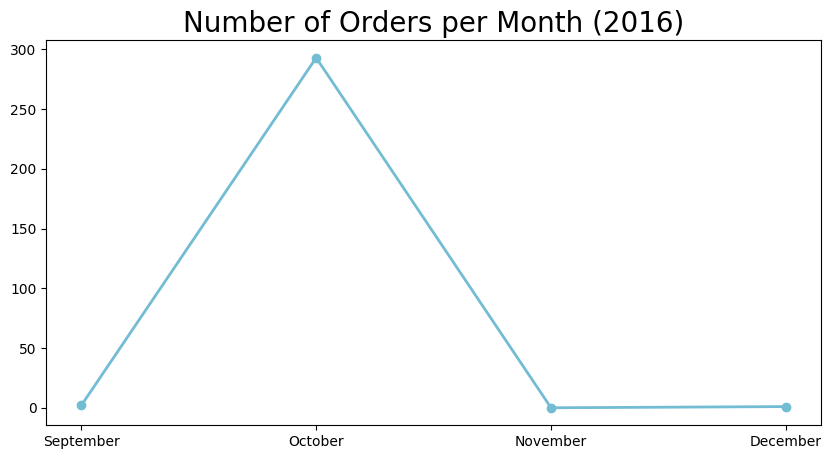

In [472]:
# df order dan pendapatan tahun 2016
all_df_2016 = all_df[all_df['order_purchase_timestamp'].dt.year == 2016]
monthly_orders_df_2016 = all_df_2016.resample(rule='M', on='order_purchase_timestamp').agg({
    'order_id': 'nunique',  # menghitung banyak order
  'total_price': 'sum'      # menghitung pendapatan
})

# format bulan
monthly_orders_df_2016.index = monthly_orders_df_2016.index.strftime('%B')
monthly_orders_df_2016 = monthly_orders_df_2016.reset_index()

# rename nama kolom
monthly_orders_df_2016.rename(columns={
    'order_id': 'order_count',
    'total_price': 'revenue'
}, inplace=True)

# membuat visualisasi
plt.figure(figsize=(10, 5))
plt.title('Number of Orders per Month (2016)', loc='center', fontsize=20)
plt.plot(monthly_orders_df_2016['order_purchase_timestamp'], monthly_orders_df_2016['order_count'], marker='o', linewidth=2,color='#72BCD4')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<ipython-input-473-4a8192aa1cfc>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df_2017 = all_df_2017.resample(rule='M', on='order_purchase_timestamp').agg({


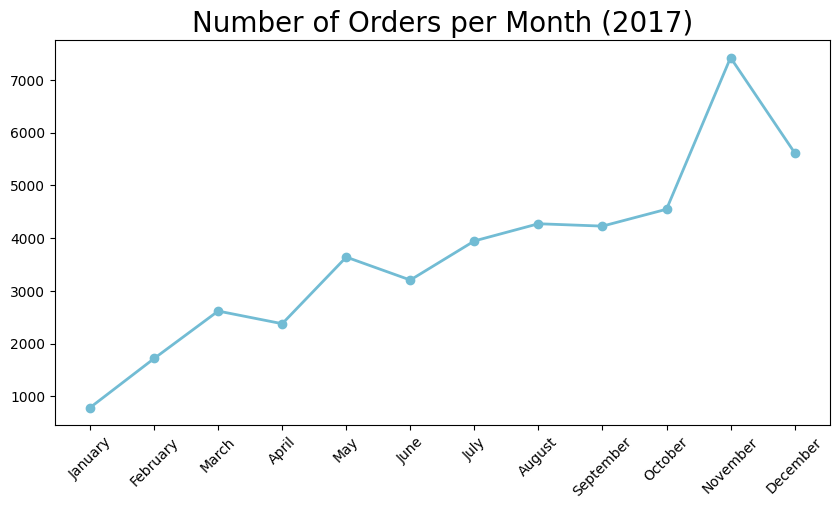

In [473]:
# df order dan pendapatan tahun 2017
all_df_2017 = all_df[all_df['order_purchase_timestamp'].dt.year == 2017]
monthly_orders_df_2017 = all_df_2017.resample(rule='M', on='order_purchase_timestamp').agg({
    'order_id': 'nunique',  # menghitung banyak order
  'total_price': 'sum'      # menghitung pendapatan
})

# format bulan
monthly_orders_df_2017.index = monthly_orders_df_2017.index.strftime('%B')
monthly_orders_df_2017 = monthly_orders_df_2017.reset_index()

# rename nama kolom
monthly_orders_df_2017.rename(columns={
    'order_id': 'order_count',
    'total_price': 'revenue'
}, inplace=True)

# membuat visualisasi
plt.figure(figsize=(10, 5))
plt.title('Number of Orders per Month (2017)', loc='center', fontsize=20)
plt.plot(monthly_orders_df_2017['order_purchase_timestamp'], monthly_orders_df_2017['order_count'], marker='o', linewidth=2,color='#72BCD4')
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=10)
plt.show()

<ipython-input-474-4ae41ed40b08>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df_2018 = all_df_2018.resample(rule='M', on='order_purchase_timestamp').agg({


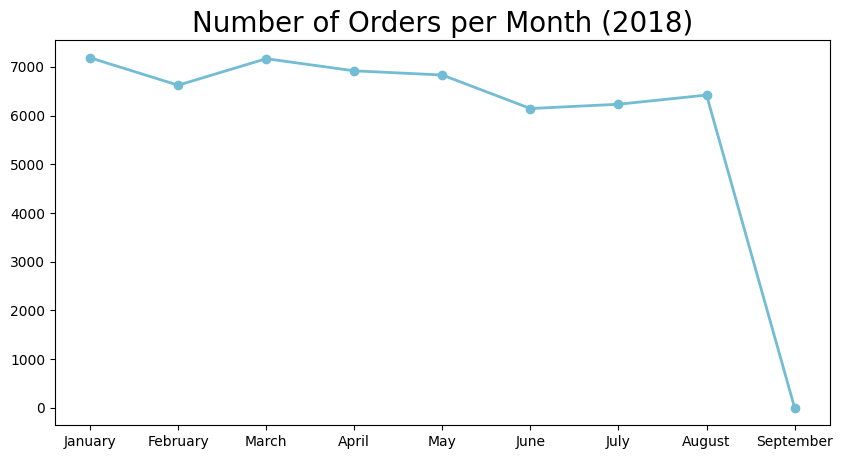

In [474]:
# df order dan pendapatan tahun 2018
all_df_2018 = all_df[all_df['order_purchase_timestamp'].dt.year == 2018]
monthly_orders_df_2018 = all_df_2018.resample(rule='M', on='order_purchase_timestamp').agg({
    'order_id': 'nunique',  # banyak pesanan
  'total_price': 'sum'      # total pendapatan
})

# format bulanan
monthly_orders_df_2018.index = monthly_orders_df_2018.index.strftime('%B')
monthly_orders_df_2018 = monthly_orders_df_2018.reset_index()

# rename nama kolom
monthly_orders_df_2018.rename(columns={
    'order_id': 'order_count',
    'total_price': 'revenue'
}, inplace=True)

# membuat visualisasi
plt.figure(figsize=(10, 5))
plt.title('Number of Orders per Month (2018)', loc='center', fontsize=20)
plt.plot(monthly_orders_df_2018['order_purchase_timestamp'], monthly_orders_df_2018['order_count'], marker='o', linewidth=2,color='#72BCD4')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

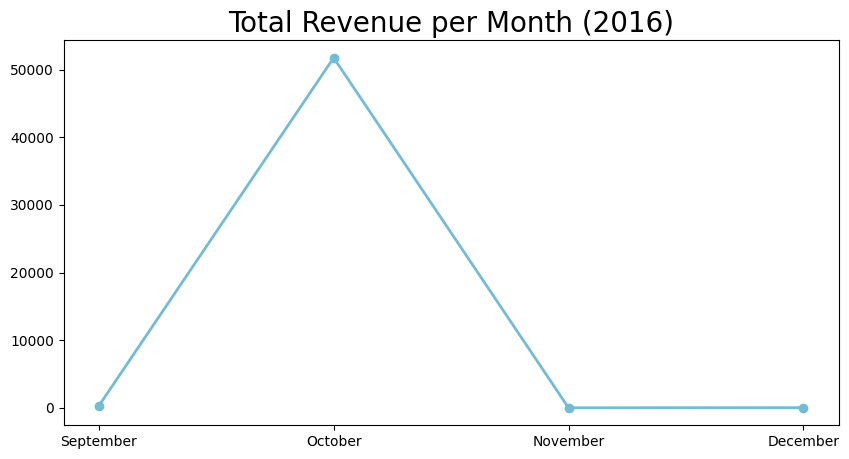

In [475]:
# visualisasi revenue
plt.figure(figsize=(10,5))
plt.plot(
    monthly_orders_df_2016['order_purchase_timestamp'],
    monthly_orders_df_2016['revenue'],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title('Total Revenue per Month (2016)', loc='center', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

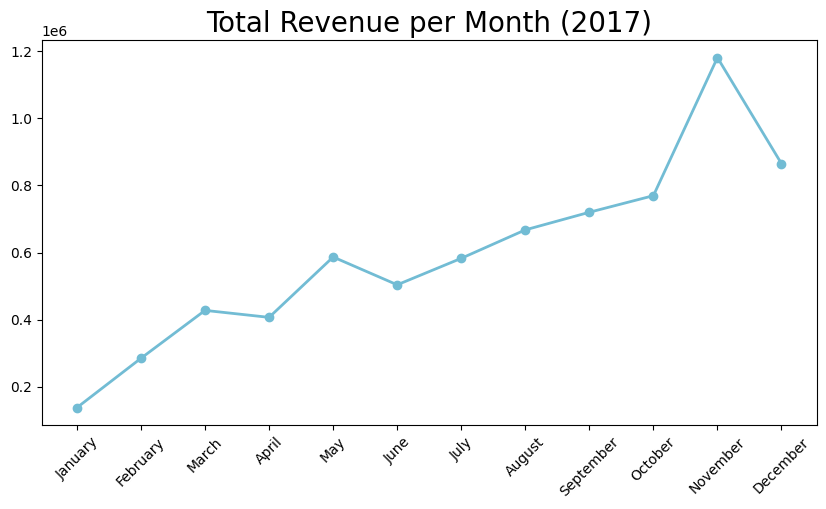

In [476]:
# visualisasi revenue
plt.figure(figsize=(10,5))
plt.plot(
    monthly_orders_df_2017['order_purchase_timestamp'],
    monthly_orders_df_2017['revenue'],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title('Total Revenue per Month (2017)', loc='center', fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

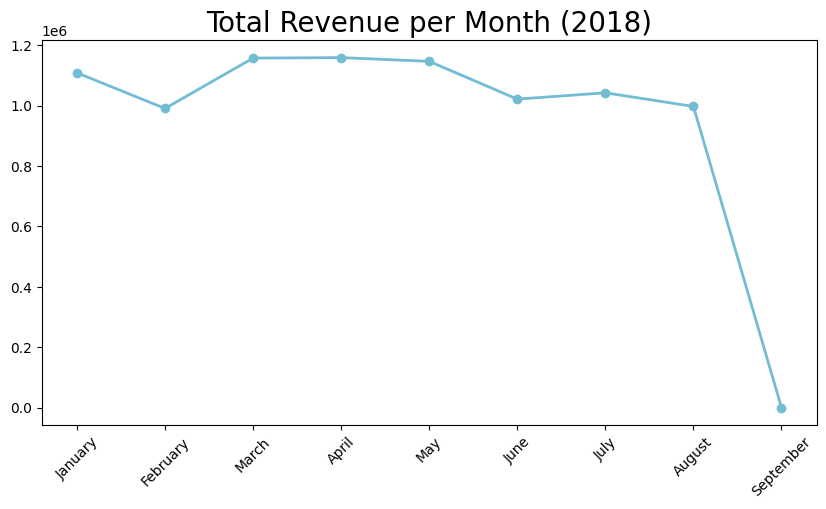

In [477]:
# visualisasi revenue
plt.figure(figsize=(10,5))
plt.plot(
    monthly_orders_df_2018['order_purchase_timestamp'],
    monthly_orders_df_2018['revenue'],
    marker='o',
    linewidth=2,
    color="#72BCD4",
)
plt.title('Total Revenue per Month (2018)', loc='center', fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

**Insight:** \\
- Pada tahun 2016 (September-December), penjualan melonjak dan puncaknya berada di awal Oktober yang kemudian menurun. Pada bulan November ke Desember tidak menunjukkan perubahan yang signifikan.
- Pada tahun 2017, penjualan menunjukkan mengalami kenaikan di mana pada bulan October-November mengalami kenaikan yang signifikan dari bulan lainnya. Kemudian pada bulan November-Desember mengalami penurunan.
- Pada thaun 2018, penjualan dari Januari ke Agustus relatif konsisten. Namun, mengalami penurunan yang signifikan pad bulan Agustus-September dan tidak ada perubahan signifikan pada September-Oktober.

### Pertanyaan 2: Kategori produk apa yang memiliki pembelian terbanyak dan tersedikit dalam beberapa bulan terakhir?

In [478]:
# df banyak pesanan per kategory
sum_order_items_df = all_df.groupby(by='product_category_name_english').order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_items_df

,product_category_name_english,order_item_id
0,bed bath table,13893.0
1,furniture decor,11593.0
2,health beauty,11103.0
3,sports leisure,9946.0
4,computers accessories,9890.0
...,...,...
67,arts and craftmanship,26.0
68,la cuisine,16.0
69,cds dvds musicals,16.0
70,fashion childrens clothes,8.0


<ipython-input-479-cac14426aba8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_item_id', y='product_category_name_english', data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
<ipython-input-479-cac14426aba8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])


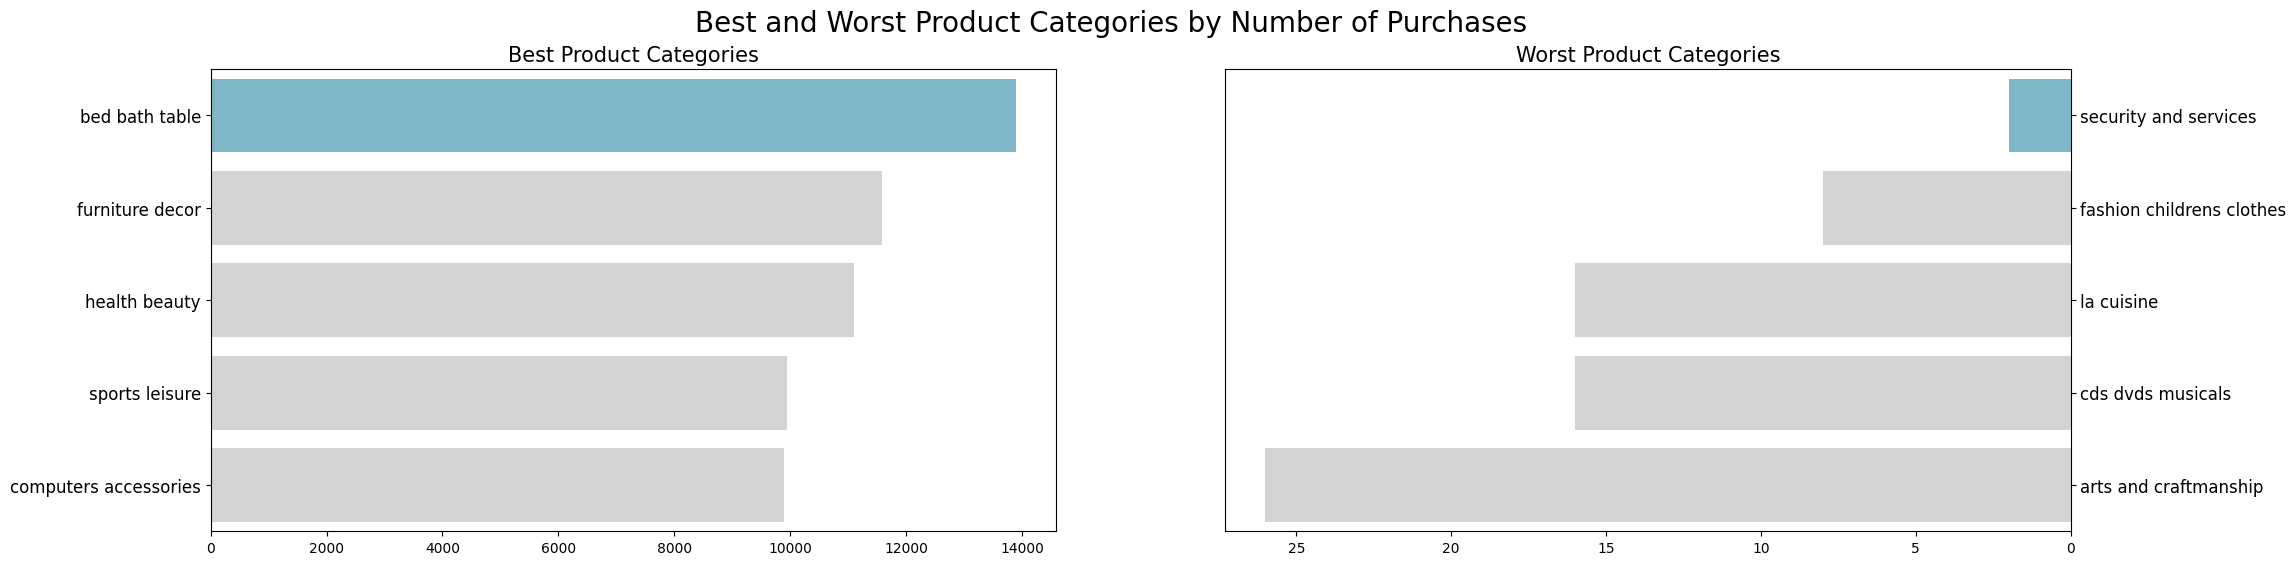

In [479]:
# banyak baris dan kolom untuk objek
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))
colors =  ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# objek 1
sns.barplot(x='order_item_id', y='product_category_name_english', data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Product Categories", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

# objek 2
sns.barplot(x="order_item_id", y="product_category_name_english", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Product Categories", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

# judul
plt.suptitle("Best and Worst Product Categories by Number of Purchases", fontsize=20)
plt.show()

**Insight:** <br>
Dari September 2018 hingga 2021 Desember, diperoleh:
- Lima kategori produk yang memiliki pembelian terbanyak berturut-turut adalah bed bath table, furniture decor, health beauty, sport leisure, dan computers accessories.
- Lima kategori produk yang memiliki pembelian tersedikit berturut-turut adalah security and services, fashion childrens clothes, cds dvds musicals, la cuisine, dan arts and craftmanship.

### Pertanyaan 3-5 :
- Kapan terakhir pembeli membeli produk?
- Berapa kali pelanggan melakukan pembelian dalam periode tertentu? \\
- Berapa rata-rata uang yang dikeluarkan pelanggan dalam pembelian pada periode tertentu?

In [480]:
# df untuk RFM
rfm_df = all_df.groupby(by='customer_unique_id', as_index=False).agg({
    'order_purchase_timestamp': 'max', #order terakhir
    'order_id': 'count', #banyak order
    'total_price': 'sum' #total pendapatan
})

# memberi nama ulang kolom
rfm_df.columns = ['customer_id', 'max_order_timestamp', 'frequency', 'monetary']


In [481]:
rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
recent_date = orders_df['order_purchase_timestamp'].dt.date.max()

# pesanan terakhir dalam hari
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date-x).days)
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

# menampilkan lima digit terakhir dari customer_id
rfm_df['customer_id_short'] = '...' + rfm_df['customer_id'].astype(str).str[-5:]

In [482]:
rfm_sort_df = rfm_df.sort_values(by='frequency', ascending=False)
rfm_sort_df

,customer_id,frequency,monetary,recency,customer_id_short
80774,d97b3cfb22b0d6b25ac9ed4e9c2d481b,24,1898.06,321,...d481b
74403,c8460e4251689ba205045f3ea17884a1,24,4655.88,26,...884a1
25771,4546caea018ad8c692964e3382debd19,21,196.17,414,...ebd19
39274,698e1cf81d01a3d389d96145f7fa6df8,20,2262.80,376,...a6df8
72817,c402f431464c72e27330a67f7b94d4fb,20,2202.40,193,...4d4fb
...,...,...,...,...,...
33683,5a67f586c461ff4fe70143d4938bc1a1,1,133.31,125,...bc1a1
33682,5a66e36a847a98dae73468778263cf81,1,166.46,69,...3cf81
33680,5a6637b7f03edf22def5e269822d4326,1,35.00,278,...d4326
33678,5a64b3fb0a71caa68a2cc3ac67c3c6df,1,48.22,26,...3c6df


<ipython-input-483-76e9814dda56>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id_short", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-483-76e9814dda56>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id_short", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-483-76e9814dda56>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id_short", data=rf

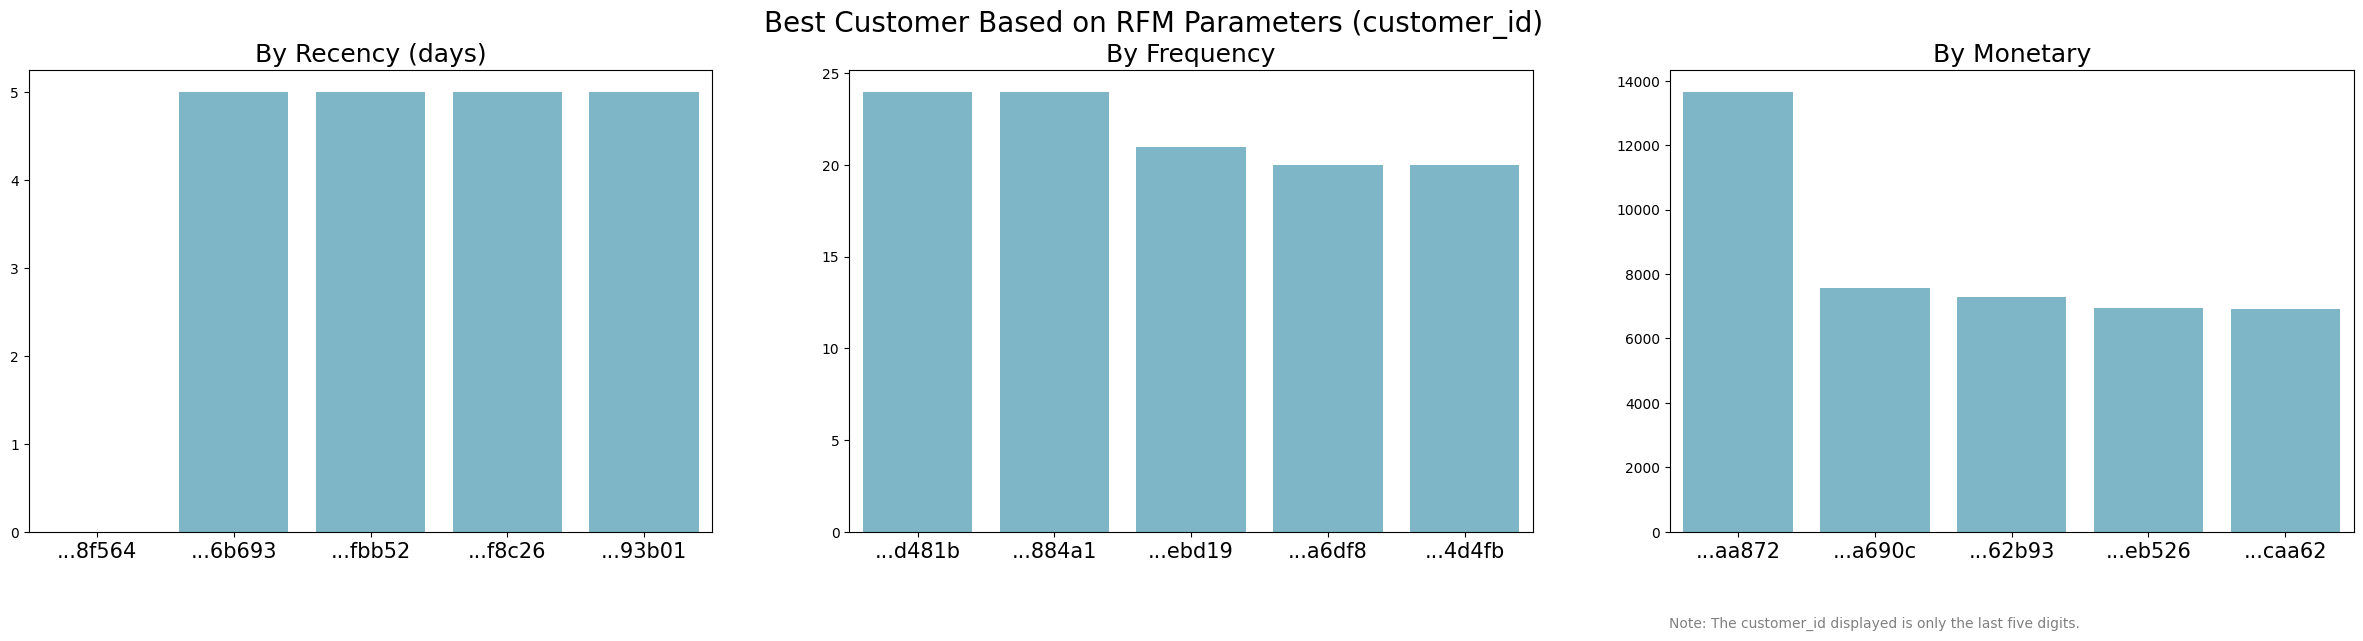

In [483]:
# membuat baris dan kolom untuk objek
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# objek 1
sns.barplot(y="recency", x="customer_id_short", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

# objek 2
sns.barplot(y="frequency", x="customer_id_short", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# objek 3
sns.barplot(y="monetary", x="customer_id_short", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

# judul dan annonate
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.annotate("Note: The customer_id displayed is only the last five digits.",
              xy=(0.3,-0.2), xycoords='axes fraction', ha='center',va='center',
              fontsize=10, color='gray')
plt.show()

**Insight:**
- Pelanggan yang terakhir kali melakukan pembelian tepat pada 3 Oktober 2018, kemudian 4 pelanggan selanjutnya melakukan pembelian 5 hari sebelumnya.
- Dua pelanggan teratas telah melakukan pembelian sebanyak 25 kali, kemudian dilanjutkan 3 pelanggan yang melakukan pembelian berturut-turut 21, 20, dan 20 kali.
- Pelanggan teratas yang mengeluarkan uang untuk pembelian memiliki perbedaan yang signifikan dengan orang ke-2.

In [484]:
all_df.to_csv('all_data.csv', index=False)

## Conclusion

- Banyaknya pembelian dan pendapatan memiliki pola yang sama (berbanding lurus). Pada tahun 2018 (September-December) mengalami kenaikan dan penurunan yang signifikan sekaligus. Sedangkan, pada tahun 2017 mengalami kenaikan yang konsisten walau sempat menurun setelah November. Dilanjutkan pada tahun 2018 relatif konsisten dan mulai menurun signifikan setelah Agustus.
- Pembelian terbanyak dicapai oleh kategori produk 'bed bath table', sedangkan pembelian tersedikit oleh kategori 'security and services'.
- Pelanggan melakukan pembelian hingga paling banyak 25 kali dalam 3 tahun. Secara keseluruhan, rata-rata pembelian yang dilakukan adalah 8.
- Paling banyak, pelanggan mengeluarkan uang untuk belanja sekitar 13000 hingga 14000 (BRL). Rata-rata keseluruhan dari uang yang dikeluarkan pelanggan adalah BRL160,97.